In [29]:
# Credit Risk Prediction Project

In [30]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [31]:
# Load the dataset
credit_data = pd.read_csv('bankloans.csv')

In [32]:
# Display first few rows to understand the data structure
print("First 5 rows of the dataset:")
print(credit_data.head())

First 5 rows of the dataset:
   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608      1.0
1   27   1      10        6      31     17.3   1.362202  4.000798      0.0
2   40   1      15       14      55      5.5   0.856075  2.168925      0.0
3   41   1      15       14     120      2.9   2.658720  0.821280      0.0
4   24   2       2        0      28     17.3   1.787436  3.056564      1.0


In [33]:
# Check for missing values
print("\nMissing values in each column:")
print(credit_data.isnull().sum())


Missing values in each column:
age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64


In [34]:
# Drop rows with missing values (alternative: could impute instead)
clean_data = credit_data.dropna()
print("\nShape after removing missing values:", clean_data.shape)


Shape after removing missing values: (700, 9)


In [35]:
# Check class distribution of target variable
print("\nDistribution of default cases:")
print(clean_data['default'].value_counts())


Distribution of default cases:
default
0.0    517
1.0    183
Name: count, dtype: int64


In [36]:
# Visualize relationships in the data
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

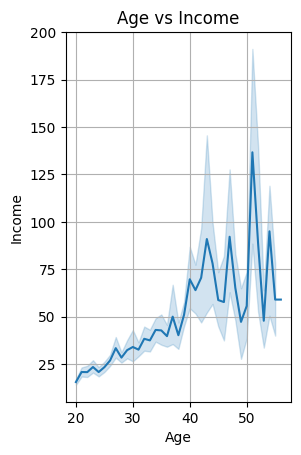

In [37]:
# Age vs Income plot
plt.subplot(1, 2, 1)
sns.lineplot(data=clean_data, x='age', y='income')
plt.title('Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(True)

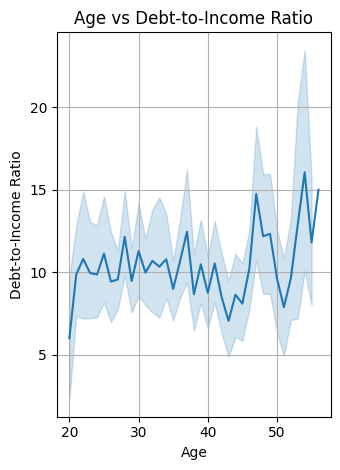

In [38]:
# Age vs Debt-to-Income Ratio plot
plt.subplot(1, 2, 2)
sns.lineplot(data=clean_data, x='age', y='debtinc')
plt.title('Age vs Debt-to-Income Ratio')
plt.xlabel('Age')
plt.ylabel('Debt-to-Income Ratio')
plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
# Prepare data for modeling
features = clean_data.drop('default', axis=1)
target = clean_data['default']

In [40]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.3, random_state=42)

In [41]:
# Standardize features (important for SVM and logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(random_state=42)
logreg_model = LogisticRegression(random_state=42)

In [43]:
# Train and evaluate Random Forest
rf_model.fit(X_train_scaled, y_train)
rf_score = rf_model.score(X_test_scaled, y_test)
print(f"\nRandom Forest Test Accuracy: {rf_score:.2f}")


Random Forest Test Accuracy: 0.82


In [44]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, features, target, cv=10)
print(f"Random Forest 10-Fold CV Average Accuracy: {rf_cv_scores.mean():.2f}")

Random Forest 10-Fold CV Average Accuracy: 0.79


In [45]:
# Train and evaluate basic SVM
svm_model.fit(X_train_scaled, y_train)
svm_score = svm_model.score(X_test_scaled, y_test)
print(f"\nBasic SVM Test Accuracy: {svm_score:.2f}")


Basic SVM Test Accuracy: 0.84


In [46]:
# Hyperparameter tuning for SVM using GridSearchCV
svm_params = {
    'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4, 7],
    'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
    'kernel': ['rbf', 'linear', 'poly']
}

tuned_svm = GridSearchCV(SVC(), svm_params, scoring='accuracy', cv=10)
tuned_svm.fit(X_train_scaled, y_train)

print("\nBest SVM Parameters:", tuned_svm.best_params_)


Best SVM Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [47]:
# Train and evaluate tuned SVM
final_svm = SVC(**tuned_svm.best_params_)
final_svm.fit(X_train_scaled, y_train)
final_svm_score = final_svm.score(X_test_scaled, y_test)
print(f"Tuned SVM Test Accuracy: {final_svm_score:.2f}")

Tuned SVM Test Accuracy: 0.86


In [48]:
# Train and evaluate Logistic Regression
logreg_model.fit(X_train_scaled, y_train)
logreg_score = logreg_model.score(X_test_scaled, y_test)
print(f"\nLogistic Regression Test Accuracy: {logreg_score:.2f}")


Logistic Regression Test Accuracy: 0.86


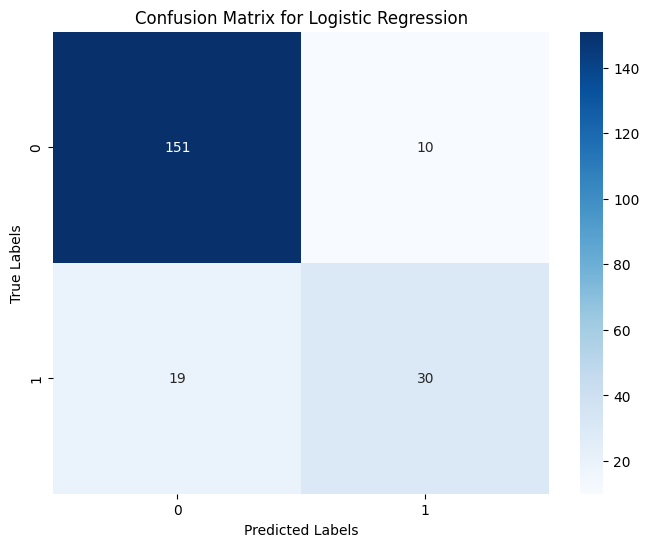

In [49]:
# Generate and plot confusion matrix for Logistic Regression
y_pred = logreg_model.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [50]:
# Print classification report for best performing model
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_model.predict(X_test_scaled)))


Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       161
         1.0       0.66      0.47      0.55        49

    accuracy                           0.82       210
   macro avg       0.75      0.70      0.72       210
weighted avg       0.81      0.82      0.81       210

